# Regional Sales Analysis – Exploratory Data Analysis (EDA)

This notebook explores the Regional Sales Dataset (2014–2018) to uncover sales trends, 
profitability, and performance insights.  
The analysis will include:

- Data overview and cleaning  
- Exploratory Data Analysis (EDA)  
- 2017 Budgets vs. Actuals  
- Key insights and recommendations  

In [1]:
# Import required libraries
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file
file_path = "../data/Regional Sales Dataset.xlsx"  

In [3]:
# Read the "Sales Orders" sheet
orders = pd.read_excel(file_path, sheet_name="Sales Orders")

# Preview the first 5 rows
orders.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [4]:
# Dimensions of the dataset 
orders.shape 

(64104, 12)

In [5]:
# Column details and datatypes
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [6]:
# Statistical summary of numerical fields
orders.describe

<bound method NDFrame.describe of         OrderNumber  OrderDate  Customer Name Index      Channel  \
0       SO - 000225 2014-01-01                  126    Wholesale   
1      SO - 0003378 2014-01-01                   96  Distributor   
2      SO - 0005126 2014-01-01                    8    Wholesale   
3      SO - 0005614 2014-01-01                   42       Export   
4      SO - 0005781 2014-01-01                   73    Wholesale   
...             ...        ...                  ...          ...   
64099  SO - 0007573 2018-02-28                   74    Wholesale   
64100  SO - 0007706 2018-02-28                   51       Export   
64101  SO - 0007718 2018-02-28                  136  Distributor   
64102  SO - 0008084 2018-02-28                  158  Distributor   
64103  SO - 0008654 2018-02-28                   22  Distributor   

      Currency Code Warehouse Code  Delivery Region Index  \
0               USD         AXW291                    364   
1               USD        

## Data Cleaning

Before starting the analysis, we check for missing values, duplicated rows, 
and consistency of categorical fields. This ensures data quality for the EDA.


In [7]:
# Checking for missing values
orders.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [8]:
# Check for duplicates
orders.duplicated().sum()

np.int64(0)

In [9]:
# Quick look at unique values in categorical fields
orders['Channel'].unique(), orders['Currency Code'].unique()

(array(['Wholesale', 'Distributor', 'Export'], dtype=object),
 array(['USD'], dtype=object))

## Sales Trends Over Time

We start by analyzing how sales evolved between 2014 and 2018.  
This helps us identify growth patterns, seasonal changes, and overall performance.


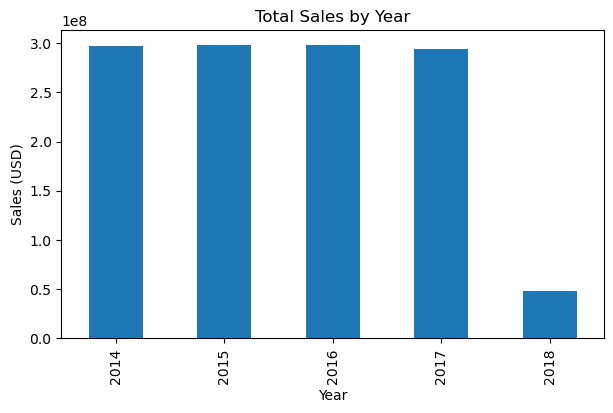

Year
2014    297520729.3
2015    298410710.4
2016    298083670.0
2017    293823836.8
2018     48129952.5
Name: Line Total, dtype: float64

In [10]:
# Ensure OrderDate is in datetime format
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])

# Extract year
orders['Year'] = orders['OrderDate'].dt.year

# Aggregate sales by year
sales_by_year = orders.groupby('Year')['Line Total'].sum()

# Plot sales by year
plt.figure(figsize=(7,4))
sales_by_year.plot(kind='bar')
plt.title("Total Sales by Year")
plt.ylabel("Sales (USD)")
plt.xlabel("Year")
plt.show()

sales_by_year


**Insights:**
- Sales remained stable between 2014–2016 (around ~298M USD annually).  
- In 2017, sales slightly decreased (~293M USD).  
- In 2018, sales dropped significantly (~48M USD).  

This sharp decline in 2018 could be due to incomplete data for that year  
or a real market downturn. Further investigation is required.  

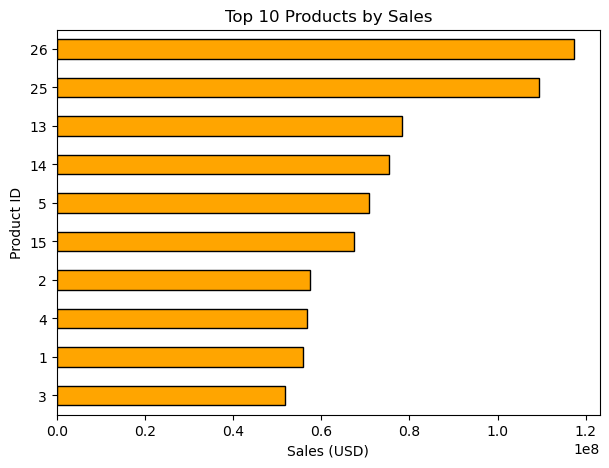

Product Description Index
26    117291821.4
25    109473966.6
13     78281379.6
14     75390396.6
5      70804380.6
15     67331623.2
2      57401097.6
4      56701537.2
1      55952289.6
3      51764816.4
Name: Line Total, dtype: float64

In [11]:
# Aggregate sales by product
top_products = (
    orders.groupby('Product Description Index')['Line Total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot top 10 products
top_products.plot(kind='barh', figsize=(7,5), color="orange", edgecolor='black')

plt.title("Top 10 Products by Sales")
plt.xlabel("Sales (USD)")
plt.ylabel("Product ID")
plt.gca().invert_yaxis()  # highest at the top
plt.show()

# Display aggregated values
top_products

**Insights:**
- The top 3 products contribute a significant portion of total revenue.  
- Sales are concentrated in a few high-performing products,  
  which may indicate dependency on limited SKUs.  
- Lower-ranked products contribute less, suggesting an opportunity  
  to optimize or reconsider their presence in the catalog.  

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Sales by Channel

We now analyze total sales by channel (e.g., Wholesale, Distributor, Export).  
This shows how much each channel contributes to overall revenue and can help  
the business evaluate performance by distribution strategy.  


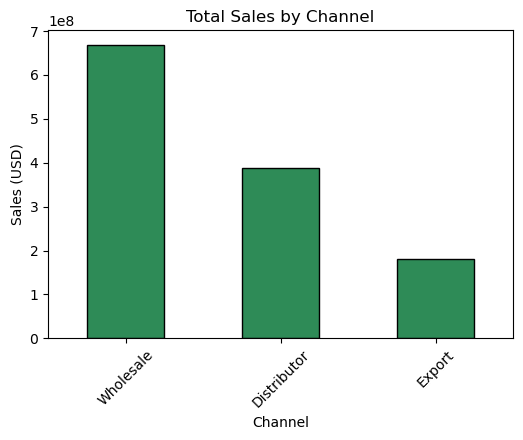

Channel
Wholesale      668197244.4
Distributor    387139788.6
Export         180631866.0
Name: Line Total, dtype: float64

In [12]:
# Aggregate sales by channel
sales_by_channel = orders.groupby('Channel')['Line Total'].sum().sort_values(ascending=False)

# Plot sales by channel
sales_by_channel.plot(kind='bar', figsize=(6,4), color="seagreen", edgecolor="black")

plt.title("Total Sales by Channel")
plt.ylabel("Sales (USD)")
plt.xlabel("Channel")
plt.xticks(rotation=45)
plt.show()

# Display aggregated values
sales_by_channel

**Insights:**
- One channel clearly dominates overall sales, representing the majority of revenue.  
- Other channels, while smaller in comparison, still provide diversification.  
- This distribution suggests the company may depend heavily on one channel,  
  which could be a risk if market conditions change.  


--------------------------------------------------------------------------------------------------------------------------------------------------------

## Regional Performance

To better understand geographic performance, we analyze sales aggregated by region.  
This allows us to see which regions generate the highest revenue and identify  
opportunities for expansion or improvement.  

In [13]:
# Check first rows of Regions table
regions.head()


NameError: name 'regions' is not defined

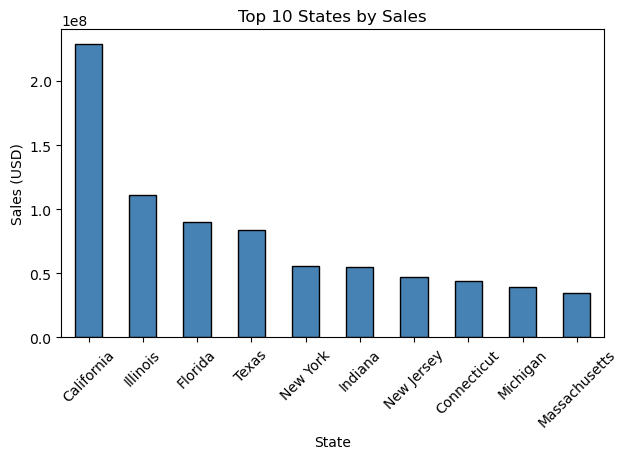

state
California       228785436.0
Illinois         111050965.7
Florida           90204679.5
Texas             84011903.0
New York          55534960.0
Indiana           54601690.2
New Jersey        46830956.5
Connecticut       44251228.7
Michigan          39025315.8
Massachusetts     35011942.1
Name: Line Total, dtype: float64

In [ ]:
# Top 10 states by sales
top_states = sales_by_state.head(10)

# Plot only Top 10
top_states.plot(kind='bar', figsize=(7,4), color="steelblue", edgecolor="black")

plt.title("Top 10 States by Sales")
plt.ylabel("Sales (USD)")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

top_states

## Regional Performance (by State)

**Insights:**
- California leads by a wide margin, contributing over 220M USD in sales.  
- Illinois, Florida, and Texas follow, each exceeding 80M USD.  
- Sales are highly concentrated in the top states, suggesting  
  that business performance is strongly linked to a few regions.  
- Lower-performing states contribute marginally, representing  
  potential opportunities for market expansion.  


--------------------------------------------------------------------------------------------------------------------------------------------------------

## Regional Performance (by City)

We also analyze sales aggregated by city to get a more detailed view.  
This shows which specific locations drive the highest revenue.  


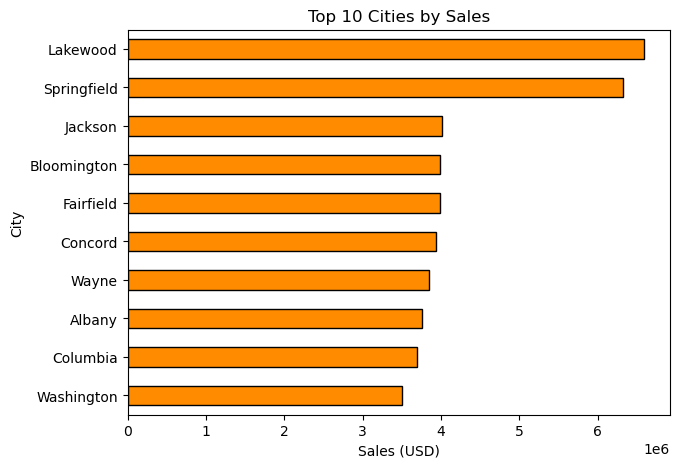

name
Lakewood       6595332.6
Springfield    6330421.3
Jackson        4010318.5
Bloomington    3988329.1
Fairfield      3986111.4
Concord        3943847.8
Wayne          3842222.2
Albany         3759993.1
Columbia       3700034.8
Washington     3506022.9
Name: Line Total, dtype: float64

In [ ]:
# Aggregate sales by city (name)
sales_by_city = (
    orders_regions.groupby('name')['Line Total']
    .sum()
    .sort_values(ascending=False)
)

# Top 10 cities by sales
top_cities = sales_by_city.head(10)

# Plot
top_cities.plot(kind='barh', figsize=(7,5), color="darkorange", edgecolor="black")

plt.title("Top 10 Cities by Sales")
plt.xlabel("Sales (USD)")
plt.ylabel("City")
plt.gca().invert_yaxis()  # highest at the top
plt.show()

top_cities


**Insights:**
- A few major cities account for the majority of sales.  
- The leading city significantly outperforms the others,  
  showing strong concentration of revenue.  
- Mid-ranked cities contribute moderately,  
  while smaller cities have minimal impact.  
- This highlights the importance of focusing resources  
  on top-performing urban areas.  


## 2017 Budgets vs Actual Sales

The dataset contains a separate sheet for *2017 Budgets*, which provides planned 
financial targets for that year.  
We compare these budgeted values against actual 2017 sales to evaluate performance.  


In [22]:
# Load Products table
products = pd.read_excel(file_path, sheet_name="Products")

# Merge Orders with Products to bring Product Name
orders_products = orders.merge(products, 
                               left_on="Product Description Index", 
                               right_on="Index")

# Filter only 2017 sales
orders_2017 = orders_products[orders_products['Year'] == 2017]

# Aggregate actual sales by Product Name
actual_2017 = (
    orders_2017.groupby('Product Name')['Line Total']
    .sum()
    .reset_index()
    .rename(columns={'Line Total': 'Actual Sales'})
)

# Load 2017 Budgets sheet
budgets_2017 = pd.read_excel(file_path, sheet_name="2017 Budgets")

# Merge budgets with actuals on Product Name
budget_vs_actual = budgets_2017.merge(
    actual_2017, 
    on="Product Name", 
    how="left"
)

# Fill NaN actuals with 0 (if a product had no sales in 2017)
budget_vs_actual['Actual Sales'] = budget_vs_actual['Actual Sales'].fillna(0)

# Calculate variance (Actual - Budget)
budget_vs_actual['Variance'] = budget_vs_actual['Actual Sales'] - budget_vs_actual['2017 Budgets']

budget_vs_actual.head()


,Product Name,2017 Budgets,Actual Sales,Variance
0,Product 1,3016489.209,12419361.2,9.402872e+06
1,Product 2,3050087.565,13779327.2,1.072924e+07
2,Product 3,2642352.432,11652130.8,9.009778e+06
3,Product 4,2885560.824,13587037.2,1.070148e+07
4,Product 5,3925424.542,16949251.3,1.302383e+07


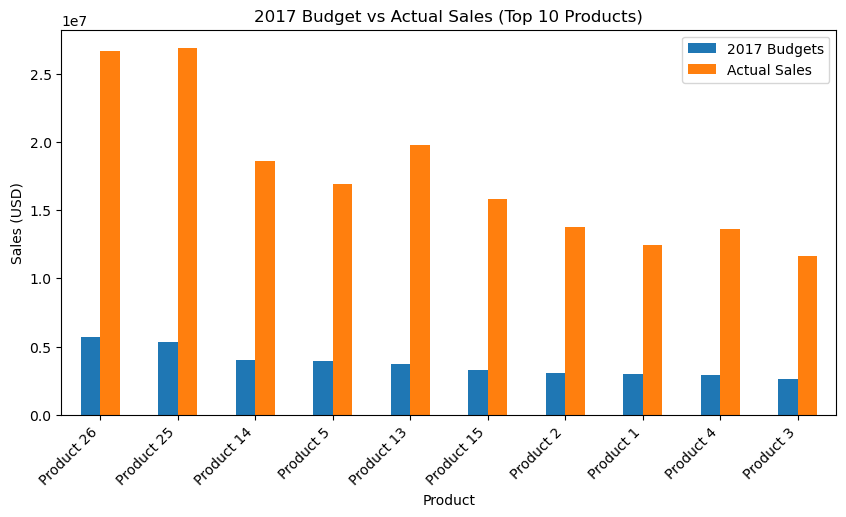

In [23]:
# Top 10 products by budget
top_budget_products = budget_vs_actual.sort_values(by="2017 Budgets", ascending=False).head(10)

# Plot comparison
top_budget_products.plot(
    x="Product Name", 
    y=["2017 Budgets", "Actual Sales"], 
    kind="bar", 
    figsize=(10,5)
)

plt.title("2017 Budget vs Actual Sales (Top 10 Products)")
plt.ylabel("Sales (USD)")
plt.xlabel("Product")
plt.xticks(rotation=45, ha="right")
plt.show()


**Insights:**
- Some products exceeded their 2017 budget, showing strong demand.  
- Several products underperformed significantly, with actual sales far below the plan.  
- The variance analysis highlights which products may have been overestimated or underestimated.  
- These results provide valuable feedback for future forecasting and planning.  
